In [2]:
# ============================================================
# ✅ ENERGY USAGE PREDICTION MODEL TRAINING (GOOGLE DRIVE)
# Dataset from Drive → Train ML Model → Save Model in Drive
# ============================================================

# ✅ STEP 1: Mount Google Drive
# ✅ Upload CSV file manually
from google.colab import files
uploaded = files.upload()

# ============================================================

# ✅ STEP 2: Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# ============================================================

# ✅ STEP 3: Load Dataset from Google Drive

# 🔥 Change this path according to where your file is saved
df = pd.read_csv("Chennai_Home_Energy_Usage_Dataset.csv")

print("✅ Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)

df.head()

# ============================================================

# ✅ STEP 4: Convert Timestamp into Features

df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month

# Drop Timestamp column
df = df.drop("Timestamp", axis=1)

print("\n✅ Timestamp Converted into Hour, Day, Month")

# ============================================================

# ✅ STEP 5: Define Input Features (X) and Target (y)

X = df.drop("TotalEnergy_kWh", axis=1)
y = df["TotalEnergy_kWh"]

print("\n✅ Features and Target Defined Successfully!")

# ============================================================

# ✅ STEP 6: Split Dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\n✅ Data Split Done!")
print("Training Samples:", X_train.shape[0])
print("Testing Samples :", X_test.shape[0])

# ============================================================

# ✅ STEP 7: Train Random Forest Regressor Model

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

print("\n✅ Model Training Completed!")

# ============================================================

# ✅ STEP 8: Model Prediction

y_pred = model.predict(X_test)

print("\n✅ Prediction Done!")

# ============================================================

# ✅ STEP 9: Evaluate Model Performance

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📌 MODEL EVALUATION RESULTS")
print("===================================")
print("MAE  :", mae)
print("RMSE :", rmse)
print("R² Score:", r2)
print("===================================")

# ============================================================

# ✅ STEP 10: Save Trained Model into Google Drive

model_path = "/content/Energy_Usage_Prediction_Model.pkl"

joblib.dump(model, model_path)

print("\n✅ Model Saved Successfully in Google Drive!")
print("📌 Saved Location:", model_path)

# ============================================================

print("\n🎉 ALL DONE SUCCESSFULLY! Your Dataset is Trained and Model is Stored in Drive.")


Saving Chennai_Home_Energy_Usage_Dataset.csv to Chennai_Home_Energy_Usage_Dataset (1).csv
✅ Dataset Loaded Successfully!
Dataset Shape: (1000, 13)

✅ Timestamp Converted into Hour, Day, Month

✅ Features and Target Defined Successfully!

✅ Data Split Done!
Training Samples: 800
Testing Samples : 200

✅ Model Training Completed!

✅ Prediction Done!

📌 MODEL EVALUATION RESULTS
MAE  : 0.15874208099914064
RMSE : 0.20034466497260286
R² Score: 0.9720388979850489

✅ Model Saved Successfully in Google Drive!
📌 Saved Location: /content/Energy_Usage_Prediction_Model.pkl

🎉 ALL DONE SUCCESSFULLY! Your Dataset is Trained and Model is Stored in Drive.


Top-2 interaction features: Kitchen_Load_kWh vs AC_Load_kWh


/tmp/ipython-input-4277631216.py:37: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


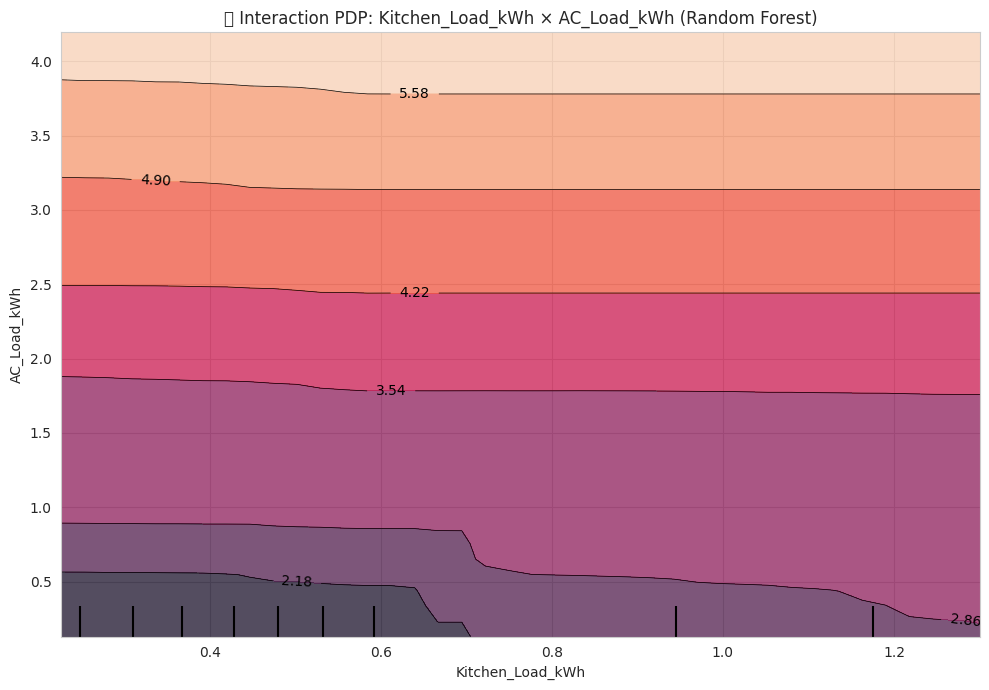

In [5]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1) Pick the top-2 most important features automatically
importances = model.feature_importances_
top2_idx = np.argsort(importances)[-2:]          # indices of top 2
f1, f2 = X.columns[top2_idx[0]], X.columns[top2_idx[1]]

print("Top-2 interaction features:", f1, "vs", f2)

# 2) Create the 2D interaction PDP (a "surface" of model behavior)
fig, ax = plt.subplots(figsize=(10, 7))

PartialDependenceDisplay.from_estimator(
    model,
    X,                       # use full X for stable PDP
    features=[(f1, f2)],      # 2D interaction
    kind="average",
    grid_resolution=40,
    ax=ax
)

ax.set_title(f"🔥 Interaction PDP: {f1} × {f2} (Random Forest)")
ax.set_xlabel(f1)
ax.set_ylabel(f2)

# 3) Overlay real data points to show where data actually exists (makes it look research-level)
# (This prevents 'fake certainty' in regions with no samples)
ax.scatter(
    X[f1].values,
    X[f2].values,
    s=8,
    alpha=0.25
)

plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

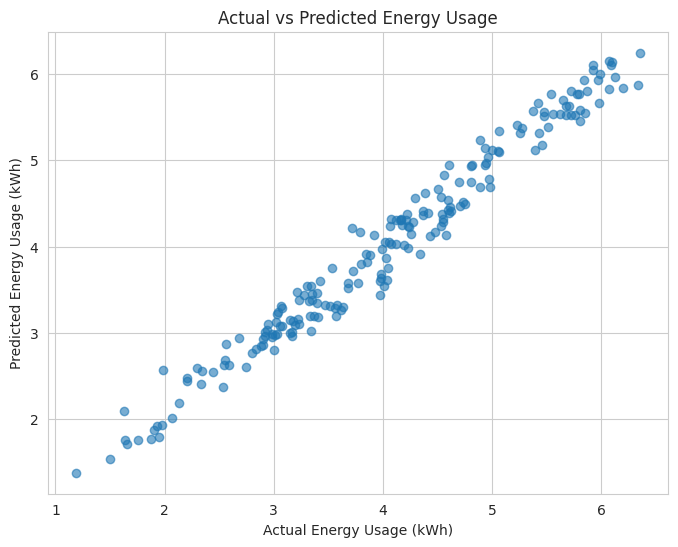

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Energy Usage (kWh)")
plt.ylabel("Predicted Energy Usage (kWh)")
plt.title("Actual vs Predicted Energy Usage")
plt.show()

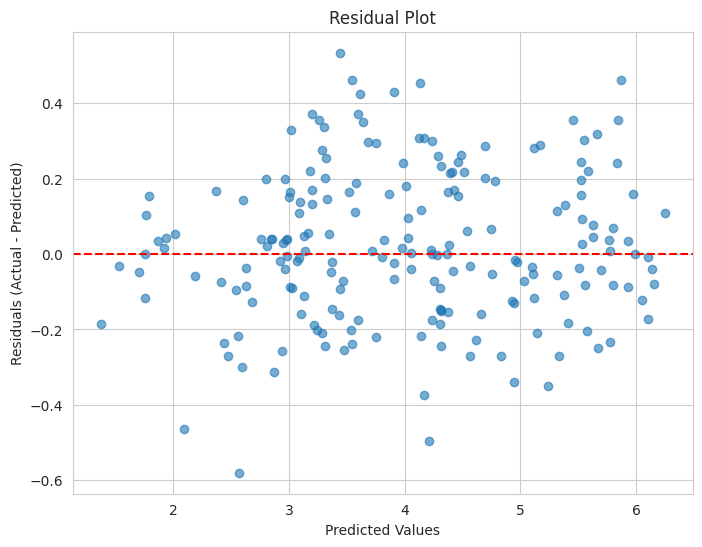

In [8]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

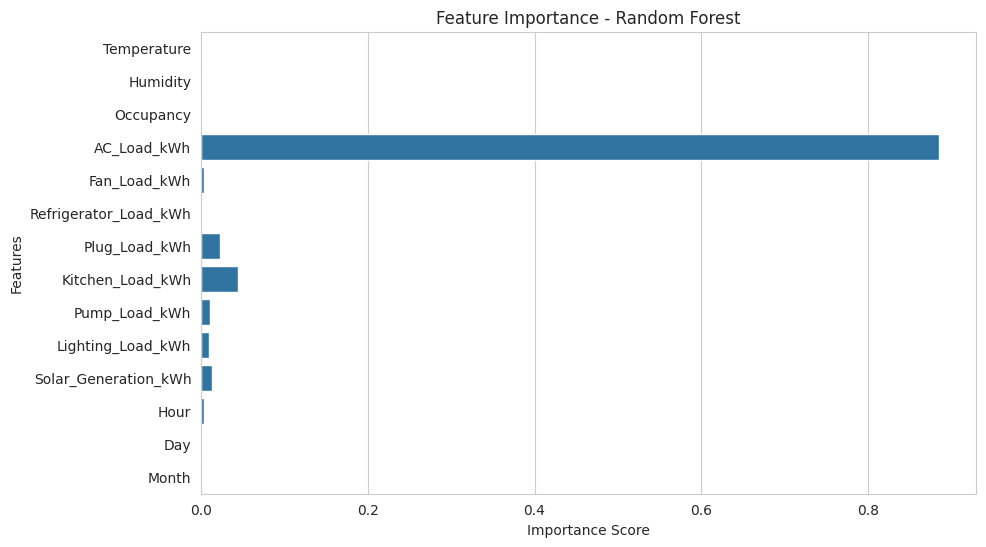

In [9]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

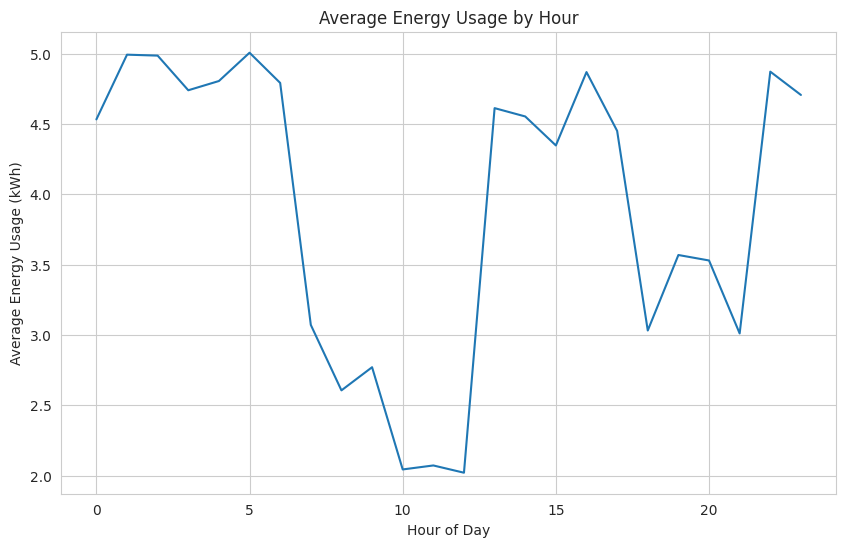

In [10]:
hourly_avg = df.groupby("Hour")["TotalEnergy_kWh"].mean()

plt.figure(figsize=(10,6))
hourly_avg.plot()
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Usage (kWh)")
plt.title("Average Energy Usage by Hour")
plt.show()

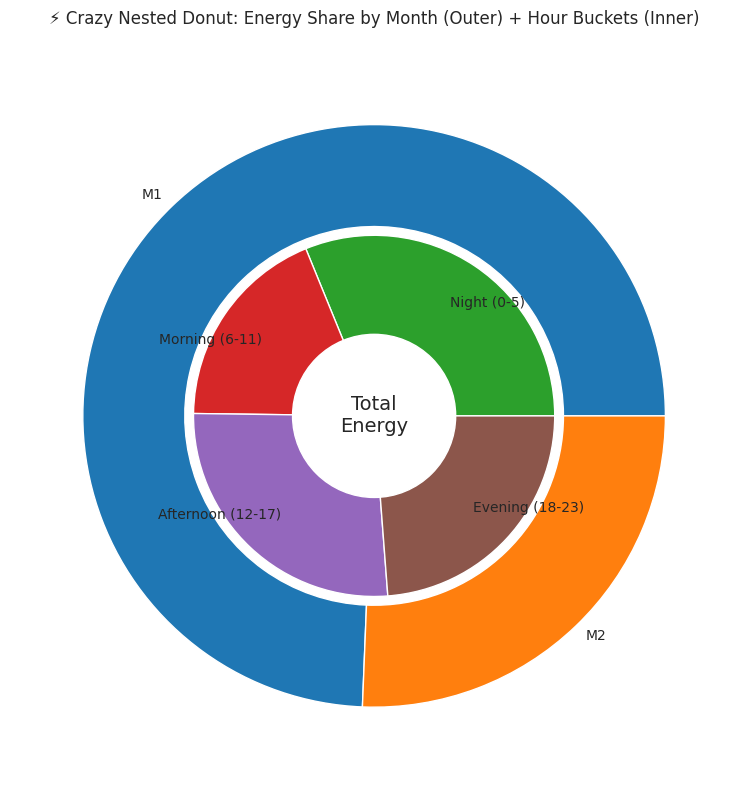

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ✅ 1) Create hour buckets (nice storytelling)
def hour_bucket(h):
    if 0 <= h <= 5:  return "Night (0-5)"
    if 6 <= h <= 11: return "Morning (6-11)"
    if 12 <= h <= 17:return "Afternoon (12-17)"
    return "Evening (18-23)"

df["HourBucket"] = df["Hour"].apply(hour_bucket)

# ✅ 2) Energy share by Month (outer ring)
month_energy = df.groupby("Month")["TotalEnergy_kWh"].sum().sort_values(ascending=False)

# ✅ Optional: group small slices into "Others" (cleaner pie)
threshold = 0.04  # 4% cutoff
total = month_energy.sum()
small = month_energy[month_energy/total < threshold]
big = month_energy[month_energy/total >= threshold]

if len(small) > 0:
    month_energy = pd.concat([big, pd.Series({"Others": small.sum()})])

# ✅ 3) Energy share by HourBucket (inner ring)
bucket_energy = df.groupby("HourBucket")["TotalEnergy_kWh"].sum().reindex(
    ["Night (0-5)", "Morning (6-11)", "Afternoon (12-17)", "Evening (18-23)"]
)

# ✅ 4) Plot Nested Donut
fig, ax = plt.subplots(figsize=(10, 8))

# Outer ring (Months)
outer_vals = month_energy.values
outer_labels = [f"M{int(m)}" if str(m).isdigit() else str(m) for m in month_energy.index]

wedges1, _ = ax.pie(
    outer_vals,
    radius=1.0,
    labels=outer_labels,
    labeldistance=1.05,
    wedgeprops=dict(width=0.35, edgecolor="white")
)

# Inner ring (Hour buckets)
inner_vals = bucket_energy.values
inner_labels = bucket_energy.index.tolist()

wedges2, _ = ax.pie(
    inner_vals,
    radius=0.62,
    labels=inner_labels,
    labeldistance=0.75,
    wedgeprops=dict(width=0.35, edgecolor="white")
)

# Center hole (donut)
centre_circle = plt.Circle((0, 0), 0.28, fc="white")
ax.add_artist(centre_circle)

# Title + center text
ax.set_title("⚡ Crazy Nested Donut: Energy Share by Month (Outer) + Hour Buckets (Inner)", pad=20)
ax.text(0, 0, "Total\nEnergy", ha="center", va="center", fontsize=14)

plt.tight_layout()
plt.show()